In [1]:
import numpy as np
import os
import segyio

def segment_segy_into_shots(sgyfile, output_path=None):
    """
    This function reads a SEG-Y file and segments it into individual shots.
    
    Args:
    sgyfile (str): Path to the SEG-Y file
    output_path (str, optional): Directory where to save the segmented data as .npy files
    
    Returns:
    tuple: Containing the number of shots processed and shot data
    """
    file_name = os.path.basename(sgyfile).replace('.sgy', '')  # Extract the filename without extension
    segmented_data = []  # List to hold shot data
    num_shots = 0  # Counter for the number of shots
    sampint = None
    
    with segyio.open(sgyfile, "r", ignore_geometry=True) as f:
        num_traces = f.tracecount
        num_samples = f.samples.size
        sampint = f.samples[1] - f.samples[0]
        print(f"Number of samples: {num_samples}, Number of traces: {num_traces}, Sample intervel:{sampint}")

        # Each shot contains 5105 traces: 1 for the source signal and 5104 for the shot
        traces_per_shot = 5105  

        for shot_index in range(num_traces // traces_per_shot):
            start_trace = shot_index * traces_per_shot
            end_trace = start_trace + traces_per_shot
            
            if end_trace > num_traces:
                break  # Prevent going out of bounds
            
            # Extract the shot (source signal + related traces) and convert it to a NumPy array
            shot_data = np.array([f.trace[i] for i in range(start_trace, end_trace)])  # Materialize into an array
            
            # Create filename for the shot and save it
            shot_filename = f"{file_name}_shot{shot_index + 1}.npy"
            if output_path:
                np.save(os.path.join(output_path, shot_filename), shot_data)

            segmented_data.append(shot_data)
            num_shots += 1
        
    return num_shots, segmented_data

# Example usage:
# num_shots_processed, all_shot_data = segment_segy_into_shots('path/to/your_file.sgy', 'path/to/save_directory')

In [ ]:
import os

print(os.getcwd())

In [2]:

data_file = '../artifacts/raw/R1809SA8S299.sgy'
output_path= '../artifacts/segmented'

# Example usage:
num_shots_processed, all_shot_data = segment_segy_into_shots(data_file,output_path=output_path)

Number of samples: 3200, Number of traces: 15315, Sample intervel:2.0


In [3]:
import numpy as np
data1 = np.load('../artifacts/segmented/R1809SA8S299_shot1.npy')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specific_trace(segment_data, trace_number):
    """
    This function takes a numpy array containing the seismic data
    and plots the amplitude versus sample number for a specific trace.
    
    Args:
    segment_data (numpy.ndarray): The seismic data in the form of a numpy array
                                   with shape (num_traces, num_samples).
    trace_number (int): Index of the trace to plot (0-based).
    
    Returns:
    None: Displays the plot.
    """
    
    # Check if trace_number is within bounds
    if trace_number < 0 or trace_number >= segment_data.shape[0]:
        raise ValueError(f'Trace number {trace_number} is out of bounds for the loaded data.')

    # Get the specific trace data
    trace_data = segment_data[trace_number]

    # Create a new figure with the specified size
    plt.figure(figsize=(10, 4))

    # Plot the specified trace data
    plt.plot(trace_data)

    # Set the title with user-friendly numbering (adding 1 for 1-based display)
    plt.title(f'Trace {trace_number + 1}')

    # Label the x-axis
    plt.xlabel('Sample Number')

    # Label the y-axis
    plt.ylabel('Amplitude')

    # Add a grid to the plot for better readability
    plt.grid()

    # Display the plot
    plt.show()



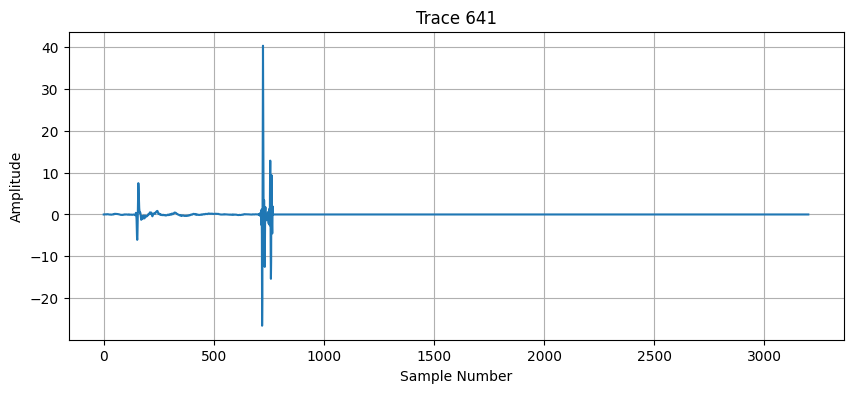

In [5]:

plot_specific_trace(data1, 640)  # Replace 0 with the desired trace number

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_seismic_data(data):
    """
    Plots a single figure for seismic data.

    Parameters:
    data (np.ndarray): The input data array with shape (NY, NX) where NY = number of time samples and NX = number of receivers.
    """
    NR, NT = data.shape  # Get the number of receivers (x-axis) and time samples (y-axis)

    receiver_numbers = np.arange(1, NR + 1)  # Receiver numbers
    time_values = np.arange(0, NT) * (1 / 500)  # Time values assuming fs = 500 Hz

    # Create the figure
    plt.figure(figsize=(12, 8))  # Size of the figure

    # Plot the seismic data
    c = plt.pcolormesh(receiver_numbers, time_values, data.T, shading='auto', cmap='RdBu_r')
    plt.title('Seismic Data')
    plt.xlabel('Receiver #')  # X-axis for receiver numbers
    plt.ylabel('Time (s)')  # Y-axis for time in seconds
    plt.xlim(receiver_numbers[0], receiver_numbers[-1])  # Limits for x-axis
    plt.ylim(time_values[-1], time_values[0])  # Invert y-axis for time

    plt.clim([-0.25, 0.25])

    # # Set dynamic color limits based on data
    # vmin = np.min(data)  # Minimum value in the data
    # vmax = np.max(data)  # Maximum value in the data
    # plt.clim(vmin, vmax)  # Apply the dynamic color limits
    plt.colorbar(label='Amplitude')  # Colorbar for the plot

    # Increase font size for visibility
    plt.rcParams.update({'font.size': 15})

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('fig_seismic_data.pdf')
    plt.show()

# Example usage:
# Assuming 'data' is your 2D numpy array of shape (599, 3200)
# plot_seismic_data(data)

In [ ]:
# Example usage:
# Assuming 'data' is your 2D numpy array
data2=data1[1:600, :]
plot_seismic_data(data2)